<a href="https://colab.research.google.com/github/chrisjason0505/DIABETES-HEALTH-INDICATORS-DS/blob/main/diabetesindicators.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
import pandas as pd

uploaded = files.upload()  # This opens the upload dialog in Colab




Saving diabetes_012_health_indicators_BRFSS2015.csv to diabetes_012_health_indicators_BRFSS2015.csv


In [2]:
# Load into pandas dataframe
df = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")

In [ ]:
df.describe()
df.head()
#df.info()


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


Let us *feel* our dataset and get an overview on the stats and indicators that we have in our disposal. The dataset we will be working with is **Diabetes Health Indicators Dataset**.


We can also see that in this dataset the age has been categorized or encoded as the highest value for age stands at 13 the median being 8  which is *quite unusual*.

In [ ]:
df['Age'].max()

13.0

In [ ]:
df['Age'].median()

8.0

Our income,education  has also been categorized in a similar manner

In [ ]:
df.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Separate numerical/categorical
num_cols = df.select_dtypes(include=['float64', 'int64']).columns


# Impute
df[num_cols] = SimpleImputer(strategy='median').fit_transform(df[num_cols])


# Encode categorical is done normally but however if u checkin this dateaset there is no need to encode column(s) of a dataset as we only have floatdatatype here so we just do imputation only


Categorial encoding is done normally but however if u checkin this dateaset there is no need to encode column(s) of a dataset as we only have floatdatatype here so we just do imputation only.

*Actually imputation isnt needed here as all values are filled but nevertheless for demonstration I have included the procedure. whether or not imputation is needed can be checked using:*

In [ ]:
df.isnull().sum().sort_values(ascending=False)

,0
Diabetes_012,0
HighBP,0
HighChol,0
CholCheck,0
BMI,0
Smoker,0
Stroke,0
HeartDiseaseorAttack,0
PhysActivity,0
Fruits,0


**Imputation? Encoding?**

 Imputation is basically a technique to fill empty values in columns using frequently occuring values or the median value of the dataset. It keeps the dataset complete in order for models to function.

Encoding changes strings into numerical format as it is then readable by machine learning algorithms.

*So we can come to a safe conclusion that the data is already well cleaned.*

In [ ]:
df.shape

(253680, 22)

 gives us no of *rows* and *columns*

Text(0.5, 1.0, 'Target Class Distribution')

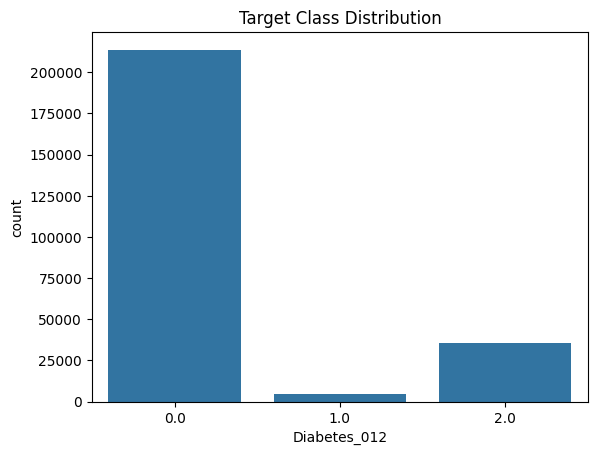

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Diabetes_012', data=df)
plt.title("Target Class Distribution")


*What does this chart describe?*

 Well,it is a simple representation of the count of each category of diabetes (0- no diabetes 1- pre diabetes 2-diabetes)

<Axes: xlabel='Diabetes_012', ylabel='Income'>

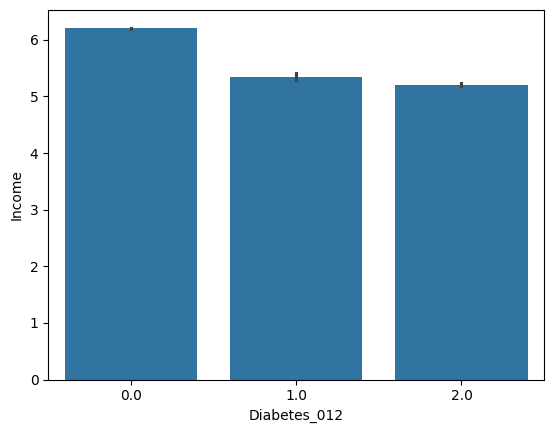

In [ ]:
# Numeric vs target
sns.barplot(x='Diabetes_012', y='Income', data=df)


This bar plot shows that individuals with a diabetes diagnosis (class 2) have lower average income compared to non-diabetic individuals (class 0), indicating a possible negative correlation between income and diabetes prevalence.

In [ ]:
df[['Income', 'Diabetes_012']].corr()

,Income,Diabetes_012
Income,1.000000,-0.171483
Diabetes_012,-0.171483,1.000000


*Thus our intuition is correct, we get a -ve value indicating -ve correlation.*

<Axes: xlabel='Diabetes_012', ylabel='Education'>

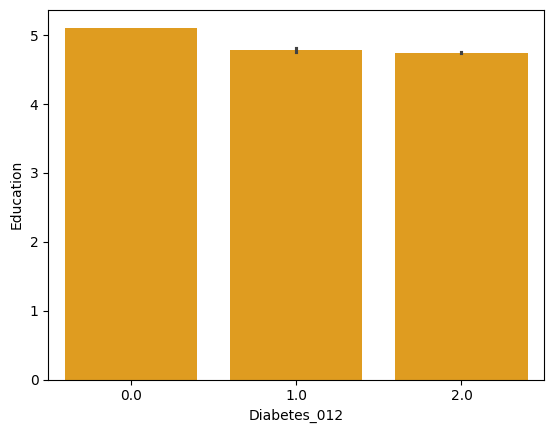

In [ ]:
sns.barplot(x='Diabetes_012', y='Education', data=df,color="orange")

This bar plot shows that individuals with a diabetes diagnosis (class 2) are less educated compared to non-diabetic individuals (class 0), indicating a possible negative correlation between education and diabetes prevalence.

In [ ]:
df[['Education', 'Diabetes_012']].corr()

,Education,Diabetes_012
Education,1.000000,-0.130517
Diabetes_012,-0.130517,1.000000


<Axes: xlabel='Diabetes_012', ylabel='Age'>

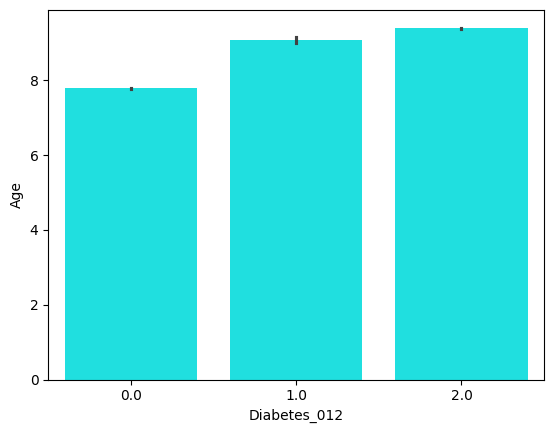

In [ ]:
sns.barplot(x='Diabetes_012', y='Age', data=df,color="cyan")

However here, it is quite the contrary.

This bar plot shows that individuals with a diabetes diagnosis (class 2) are older compared to non-diabetic individuals (class 0), indicating a possible positive correlation between age and diabetes prevalence.
Same holds for class 2 over class 1 and class 1 over class 0.

In [ ]:
df[['Age', 'Diabetes_012']].corr()

,Age,Diabetes_012
Age,1.000000,0.185026
Diabetes_012,0.185026,1.000000


Earlier we have explored charts by categorizing diabetes into 3 : diabetes,prediabetes and no diabates. But now we will be basing on charts on the mean i.e *the mean of diabetes readings taken with possible values being: 0,1,2.*

And we narrow the class to 2 nos: 1. no diabetes 2. prediabetic or diabetic

/tmp/ipython-input-18-735591277.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='HighBP', y='Diabetes_012', data=df, ci=None)


Text(0.5, 1.0, 'Diabetes Level by High Blood Pressure Status')

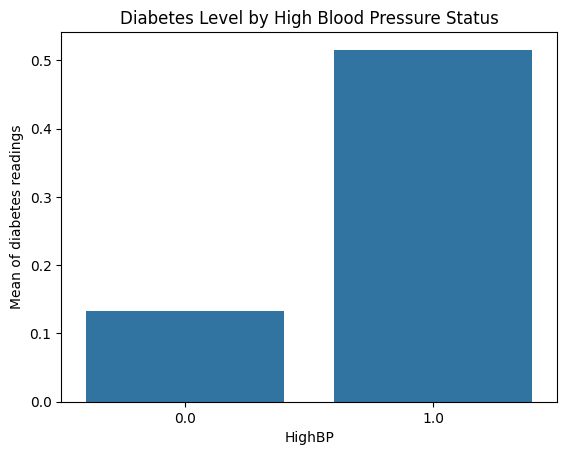

In [ ]:
sns.barplot(x='HighBP', y='Diabetes_012', data=df, ci=None)
plt.ylabel("Mean of diabetes readings")
plt.title('Diabetes Level by High Blood Pressure Status')


We can see the bar for HighBP = 1 is higher, it means that:

This bar plot shows that individuals with a diabetes diagnosis (class 2) have higher BP count compared to non-diabetic individuals (class 0), indicating a possible positive correlation between income and diabetes prevalence.


"People with high blood pressure are more likely to also have diabetes or be pre-diabetic."

This is called comorbidity — when two medical conditions tend to occur together.

In [ ]:
df[['Age', 'Diabetes_012']].corr()

,Age,Diabetes_012
Age,1.000000,0.185026
Diabetes_012,0.185026,1.000000


/tmp/ipython-input-20-1967568301.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Income', y='Diabetes_012', hue='Sex', data=df,ci=None)


<Axes: xlabel='Income', ylabel='Diabetes_012'>

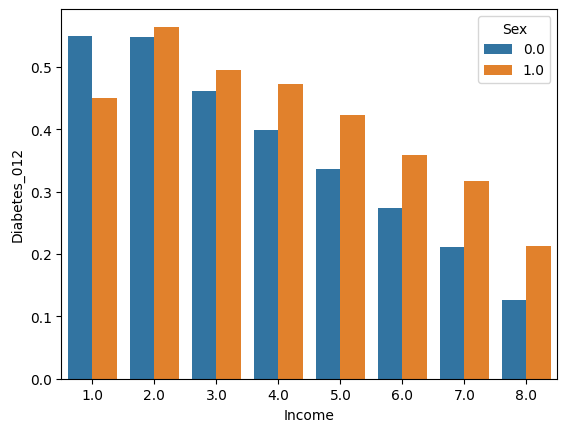

In [ ]:
sns.barplot(x='Income', y='Diabetes_012', hue='Sex', data=df,ci=None)

Here we use the visual storytelling element where we check ..

**Sex v Income v Diabetes**

Income effect on diabetes:

As income increases, average diabetes class tends to decrease (bars get shorter).

This suggests higher income groups have lower diabetes risk.




 *Here 0.0 represents females and 1.0 represents males*

When comparing sexes:

At lower income levels, males (1) tend to have higher average diabetes risk than females (0).

This suggests that low-income males are more vulnerable to diabetes compared to females in the same income bracket.

At higher income levels, the diabetes risk for both sexes is lower and more similar, implying income may help reduce the gap.

Overall, both income and sex influence diabetes risk, with low-income males showing the highest risk in this dataset.



In [ ]:
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


**SUMMARY(INFOGRAPHICS)**
🧠


 Diabetes & Socio-Demographic Analysis
This project analyzes how demographic and lifestyle factors such as gender, age, and income relate to diabetes prevalence using the BRFSS 2015 dataset.

Even though the dataset was relatively clean, I applied additional preprocessing, including:

Encoding of categorical variables (e.g., gender)

Imputation for any inconsistencies or missing values

General data cleaning to ensure robustness

Key visualizations include:

Gender vs Diabetes vs Income

Age vs Diabetes

Income vs Diabetes

These visual insights help uncover trends and inequalities in diabetes risk based on socio-economic factors. The project blends exploratory data analysis (EDA) with real-world health data.

**EXPLORATORY DATA ANALYSIS(EDA)**

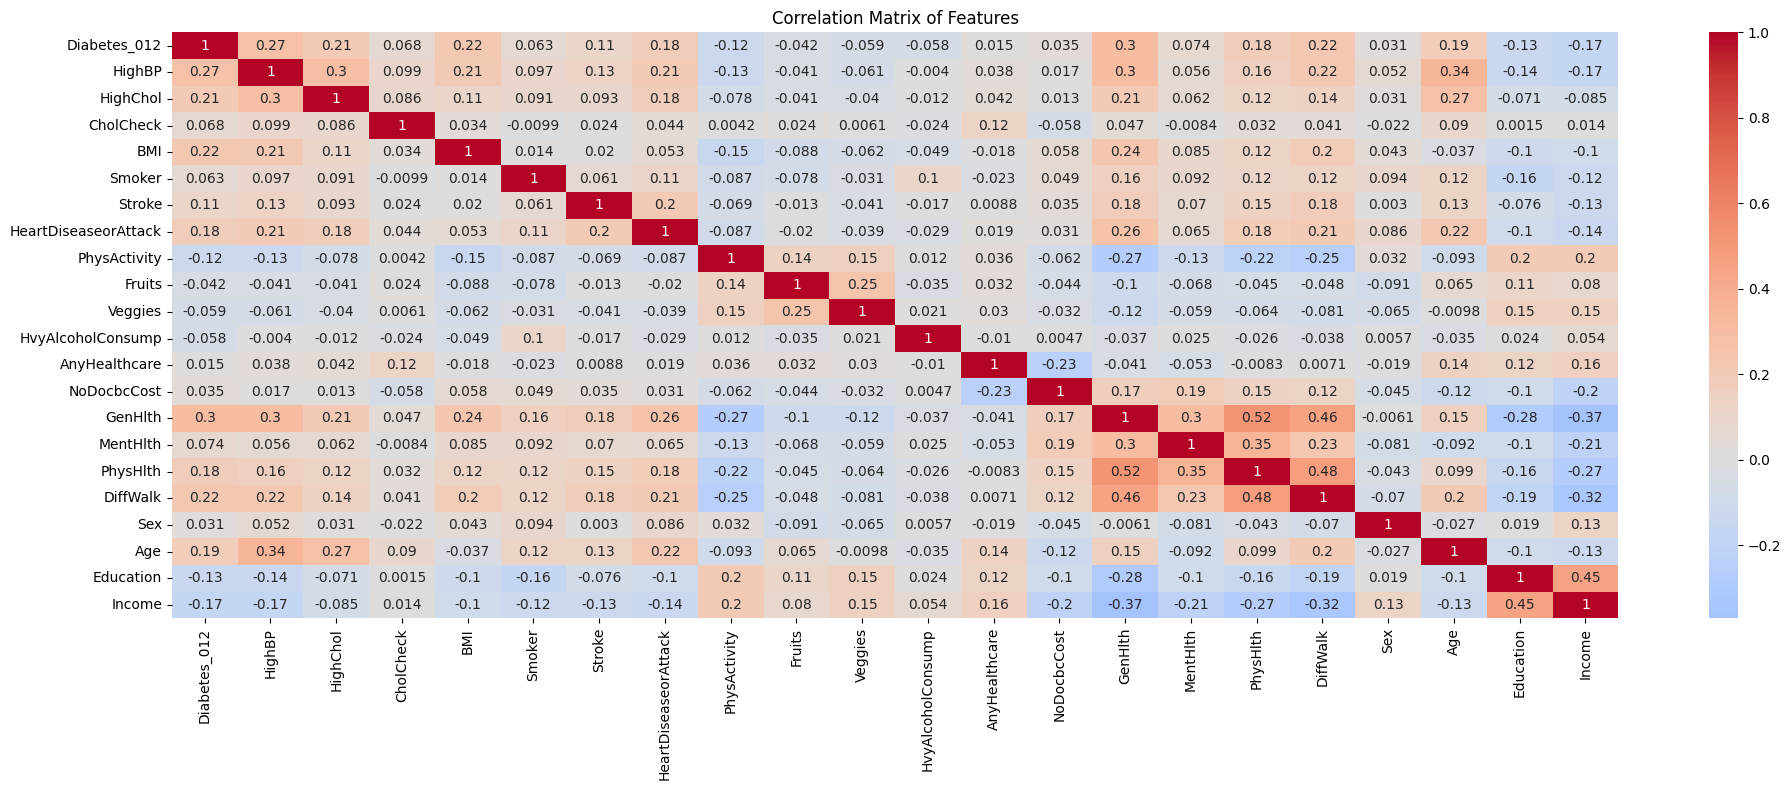

In [7]:

# Create correlation matrix heatmap
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Features')
plt.tight_layout()
plt.show()



As we see here, we see that the features: CholCheck,Fruits,Veggies,HvyAlcoholConsump,NoDocbcCost,AnyHealthcare,MentHlth hold very less correlation to the target variable so we drop them from the model.

In [9]:
# Drop the columns with low correlation as identified in the previous markdown cell
columns_to_drop = ['CholCheck', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'NoDocbcCost', 'AnyHealthcare', 'MentHlth','Sex']
df_dropped = df.drop(columns=columns_to_drop)
print("DataFrame after dropping low correlation columns:")
display(df_dropped.head())

DataFrame after dropping low correlation columns:


,Diabetes_012,HighBP,HighChol,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,GenHlth,PhysHlth,DiffWalk,Age,Education,Income
0,0.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,5.0,15.0,1.0,9.0,4.0,3.0
1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,3.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,5.0,30.0,1.0,9.0,4.0,8.0
3,0.0,1.0,0.0,27.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,11.0,5.0,4.0


The correlation map does not paint the whole picture as it only captures linear relationships.So we resort to Cramer's V to get a better understanding of the data.

In [10]:
import numpy as np
import scipy.stats as ss
def cramers_v(x, y):
    """ Calculates Cramer's V statistic for categorical variables. """
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Assuming df_dropped is the DataFrame after dropping low correlation columns
# Select only categorical/binary columns that are left (most are binary in this dataset)
categorical_cols = df_dropped.columns.tolist()

cat_corrs = {}
for i in range(len(categorical_cols)):
    for j in range(i + 1, len(categorical_cols)):
        col1 = categorical_cols[i]
        col2 = categorical_cols[j]
        v = cramers_v(df_dropped[col1], df_dropped[col2])
        cat_corrs[(col1, col2)] = v

# Convert to DataFrame for better viewing and sorting
cat_corrs_df = pd.DataFrame(list(cat_corrs.items()), columns=['FeaturePair', 'CramersV'])
cat_corrs_df[['Feature1', 'Feature2']] = pd.DataFrame(cat_corrs_df['FeaturePair'].tolist(), index=cat_corrs_df.index)
cat_corrs_df.drop('FeaturePair', axis=1, inplace=True)

# Display correlations above a certain threshold (e.g., 0.1)
print("Categorical Feature Associations (Cramér’s V > 0.1):")
display(cat_corrs_df[cat_corrs_df['CramersV'] > 0.1].sort_values(by='CramersV', ascending=False))


Categorical Feature Associations (Cramér’s V > 0.1):


,CramersV,Feature1,Feature2
77,0.499698,GenHlth,DiffWalk
81,0.488211,PhysHlth,DiffWalk
22,0.347974,HighBP,Age
76,0.330688,GenHlth,PhysHlth
87,0.321702,DiffWalk,Income
...,...,...,...
47,0.114411,Smoker,HeartDiseaseorAttack
4,0.107191,Diabetes_012,Stroke
84,0.106095,PhysHlth,Income
89,0.103421,Age,Income


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['CramersV'].plot(kind='hist', bins=20, title='CramersV')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='index', y='CramersV', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['CramersV'].plot(kind='line', figsize=(8, 4), title='CramersV')
plt.gca().spines[['top', 'right']].set_visible(False)

Despite features holding weak  non-linear correlations with each other(0.1-0.3 for the majority),their correlation isnt so insignificant to drop them completely.

**MODEL BUILDING AND EVALUATION**

So we gonna be building different models and checking their accuracy. We will be using some of the other columns as our predictve features and modified version of Binary_012  which is Diabetes Binary (reduced to 2 classes) as our target and start modelling.

🎯 What Should Our Model Emphasize?
In the context of diabetes prediction, your model should focus on:
✅ Minimizing False Negatives
Because a false negative means the model says someone does not have diabetes, but they actually do — this is risky and dangerous in healthcare.



So our goal is to increase recall for the diabetic class (class 1):
Recall (Sensitivity) = TP / (TP + FN)
→ How many actual diabetics we correctly identified.

🔍 Why Not Just Maximize Accuracy?
Accuracy is misleading in imbalanced data.

E.g., if 85% are non-diabetics, a dumb model that always says "not diabetic" still gets 85% accuracy!

But its recall for diabetics will be near zero, which is unacceptable in health applications.

✅ So, what’s our model’s main priority?
Maximize recall for the diabetic class (class 1), even if that means accepting more false positives.

Think: better to warn 5 people unnecessarily than to miss 1 diabetic case.

UPDATED COLUMN WITH MODIFIED CLASSES(DIABETES_BINARY)

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# load our dataset


# Merge pre-diabetic and dibetic class
df_dropped['Diabetes_binary'] = df_dropped['Diabetes_012'].apply(lambda x: 1 if x in [1, 2] else 0)
df_dropped.drop('Diabetes_012', axis=1, inplace=True)

**In a nutshell; we see the confusion matrix.In that matrix we try to minimize the hue of the bottom-left square(false negatives) i.e keep the color of bottom left square as light as possible(ideally white and false_negatives=0)**

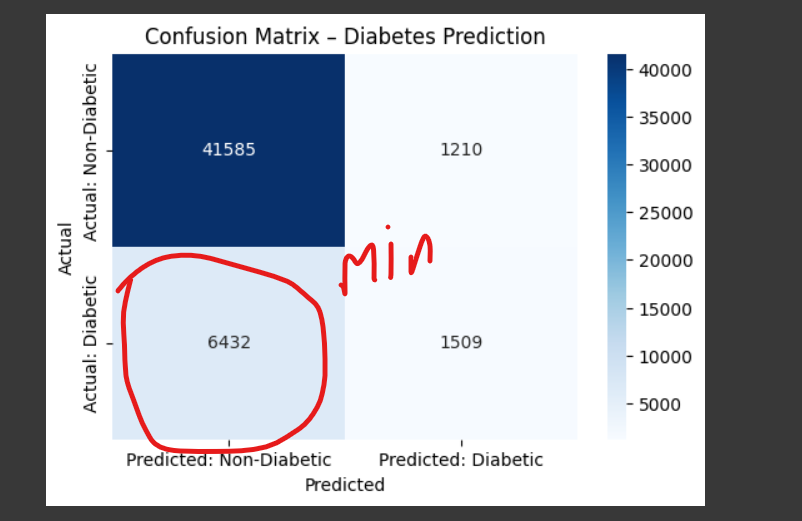

**RANDOM FOREST MODEL**

In [15]:
#random forest model
X = df_dropped.drop('Diabetes_binary', axis=1)
y = df_dropped['Diabetes_binary']

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Step 7: Predict and evaluate
y_pred = model.predict(X_test_scaled)

print("🔍 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))

🔍 Confusion Matrix:
[[40452  2343]
 [ 6003  1938]]

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     42795
           1       0.45      0.24      0.32      7941

    accuracy                           0.84     50736
   macro avg       0.66      0.59      0.61     50736
weighted avg       0.81      0.84      0.81     50736



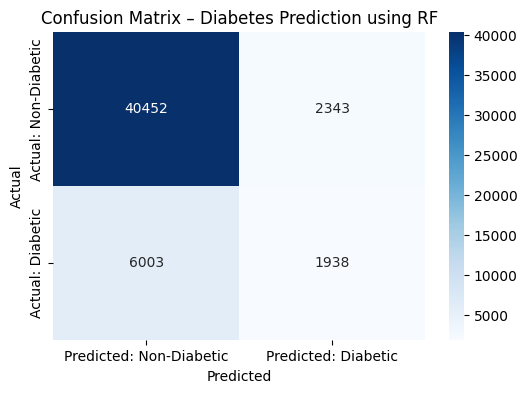

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Visual representation of confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Predicted: Non-Diabetic", "Predicted: Diabetic"],
            yticklabels=["Actual: Non-Diabetic", "Actual: Diabetic"])
plt.title("Confusion Matrix – Diabetes Prediction using RF")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

The model is fairly accurate at predicting diabetes giving us **84% accuracy**.
But we don care much about *accuracy* here.

 It correctly identifies most diabetic cases and doesn't often give false alarms. However, there’s still some room to improve how well it catches every actual diabetic case. We now make it smarter by removing useless or duplicate-like data and balancing its learning across all types of cases.

🔍 Confusion Matrix:
[[29984 12757]
 [ 1849  6146]]

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.70      0.80     42741
           1       0.33      0.77      0.46      7995

    accuracy                           0.71     50736
   macro avg       0.63      0.74      0.63     50736
weighted avg       0.84      0.71      0.75     50736



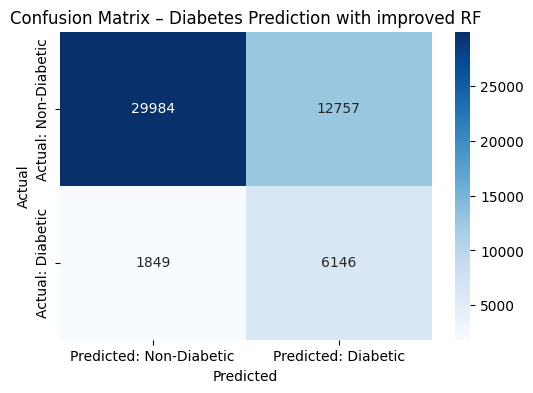

In [18]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import VarianceThreshold
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

X = df_dropped.drop('Diabetes_binary', axis=1)
X_var = selector.fit_transform(X)
selected_cols = X.columns[selector.get_support()]


corr_matrix = X_clean.corr().abs()
X_clean = X_clean.drop(columns=to_drop)

# Final cleaned features
y = df_dropped['Diabetes_binary']
X_cleaned_final = X_clean.copy()

# === Step 2: Stratified Split ===
X_train, X_test, y_train, y_test = train_test_split(
    X_cleaned_final, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# === Step 4: Train Improved Random Forest ===
model = RandomForestClassifier(
    n_estimators=300,
    max_depth=5,
    min_samples_split=5,
    min_samples_leaf=4,
    max_features='sqrt',
    class_weight='balanced',
    random_state=42
)
model.fit(X_train_scaled, y_train)

# === Step 5: Evaluate ===
y_pred = model.predict(X_test_scaled)

print("🔍 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Predicted: Non-Diabetic", "Predicted: Diabetic"],
            yticklabels=["Actual: Non-Diabetic", "Actual: Diabetic"])
plt.title("Confusion Matrix – Diabetes Prediction with improved RF")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()





So here even though our accuracy has decreased after applying stratification and dropping columns with high +ve correlation and less variance.. we are able to detect way **more true positives** which holds more *significance in the medical field*.

**XGBOOST ALGORITHM**

🔍 Confusion Matrix:
[[41483  1312]
 [ 6236  1705]]

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92     42795
           1       0.57      0.21      0.31      7941

    accuracy                           0.85     50736
   macro avg       0.72      0.59      0.61     50736
weighted avg       0.82      0.85      0.82     50736



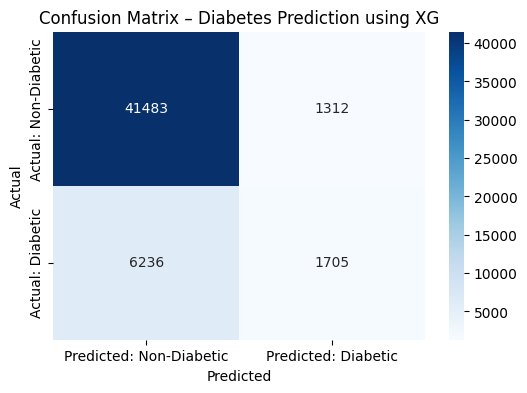

In [ ]:
import xgboost
from sklearn.feature_selection import VarianceThreshold
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


X = df.drop('Diabetes_binary', axis=1)
y = df['Diabetes_binary']

#  Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#  Train the model using XGBoost here
model = XGBClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

#  Prediction and evaluate
y_pred = model.predict(X_test_scaled)

print("🔍 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))

# Visual representation of confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Predicted: Non-Diabetic", "Predicted: Diabetic"],
            yticklabels=["Actual: Non-Diabetic", "Actual: Diabetic"])
plt.title("Confusion Matrix – Diabetes Prediction using XG")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()


**⚠️ Key Observations**

Class 0 (Non-diabetic): Very well predicted

Class 1 (Diabetic): Weak recall.. although there is a slight improv w.r.t random forest model,the model misses most diabetics.

This is NOT GOOD in medical contexts where false negatives are dangerous



/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:25:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


🔍 Confusion Matrix:
[[40516  2225]
 [ 6139  1856]]

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     42741
           1       0.45      0.23      0.31      7995

    accuracy                           0.84     50736
   macro avg       0.66      0.59      0.61     50736
weighted avg       0.80      0.84      0.81     50736



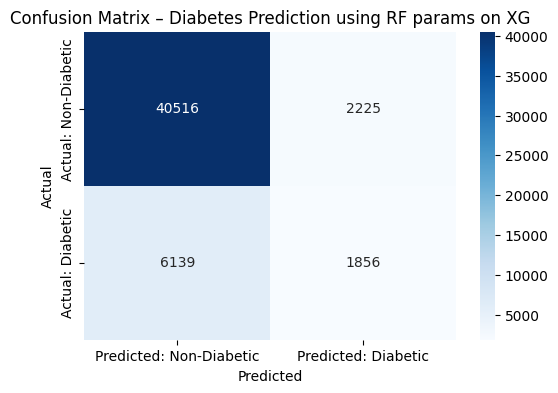

In [20]:
import pandas as pd
import xgboost
from xgboost import XGBClassifier
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import VarianceThreshold
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix



X = df_dropped.drop('Diabetes_binary', axis=1)
X_var = selector.fit_transform(X)
selected_cols = X.columns[selector.get_support()]


# Final cleaned features
y = df_dropped['Diabetes_binary']


# stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



model = XGBClassifier(
    n_estimators=200,
    max_depth=10,
    subsample=0.8,            # Instead of class_weight, help balance via boosting and subsampling
    colsample_bytree=0.7,     # Rough equivalent of max_features='log2'
    scale_pos_weight=1,       # Use for imbalance; set >1 for minority class boosting
    random_state=42,
    use_label_encoder=False,  # To avoid warning in older XGBoost versions
    eval_metric='logloss'     # Explicit metric for classification
)



model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
cm=confusion_matrix(y_test, y_pred)

print("🔍 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Predicted: Non-Diabetic", "Predicted: Diabetic"],
            yticklabels=["Actual: Non-Diabetic", "Actual: Diabetic"])
plt.title("Confusion Matrix – Diabetes Prediction using RF params on XG")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()


Well.. there isnt much of an improvement. The main aim of our model is to build one that minimizes **false negatives** but here false negatives still stands at a quite high number.

XGBoost doesn't work well here because your dataset is highly imbalanithout ced, and by default, XGBoost treats all classes equally. However XGBoost(w.o tweaks) does better than RandomBoost(w.o tweaks).
Doesnt mean that for any *tweak* RF performs well it's just that the tweaks we have applied now made little to no change to the model because **xgboost needs to be finetuned properly**.

**LOGISTIC REGRESSION**

Confusion Matrix:
[[41617  1178]
 [ 6489  1452]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92     42795
           1       0.55      0.18      0.27      7941

    accuracy                           0.85     50736
   macro avg       0.71      0.58      0.60     50736
weighted avg       0.82      0.85      0.82     50736



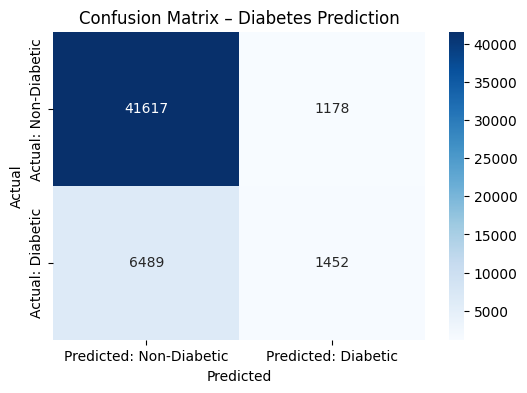

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare data (same as before)
X = df_dropped.drop('Diabetes_binary', axis=1)
y = df_dropped['Diabetes_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize model with default parameters
logreg = LogisticRegression(random_state=42, max_iter=1000)

# Training of mdoel
logreg.fit(X_train_scaled, y_train)

# Predicting model
y_pred = logreg.predict(X_test_scaled)


# Evaluating it using confusion matrix
cm=confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visual representation of confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Predicted: Non-Diabetic", "Predicted: Diabetic"],
            yticklabels=["Actual: Non-Diabetic", "Actual: Diabetic"])
plt.title("Confusion Matrix – Diabetes Prediction")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

*We still we have a lot of false negatives which opposes the primary aim of our model which is to have ideal recall and minimize false negatives as much as possible.*

**logistic regression(updated params)**

Confusion Matrix:
[[30868 11927]
 [ 1875  6066]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.72      0.82     42795
           1       0.34      0.76      0.47      7941

    accuracy                           0.73     50736
   macro avg       0.64      0.74      0.64     50736
weighted avg       0.85      0.73      0.76     50736



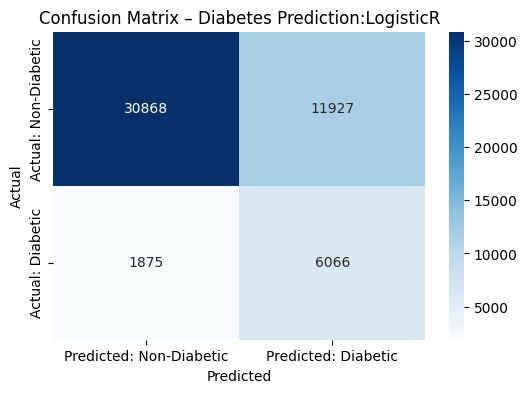

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Data prep same as above
X = df_dropped.drop('Diabetes_binary', axis=1)
y = df_dropped['Diabetes_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize model with tweaks
logreg_tweaked = LogisticRegression(
    random_state=42,
    max_iter=1000,
    class_weight='balanced',  # gives more weights to classes that have lesser frequencies i.e sample has 90 freq. then weight will be less compared to sample with 60 freqs
    #so like underdog classes also get recognized get me?
    solver='lbfgs'#simple optimization method
)

# Training of model
logreg_tweaked.fit(X_train_scaled, y_train)

# Predictions
y_pred_tweaked = logreg_tweaked.predict(X_test_scaled)

cm=confusion_matrix(y_test, y_pred_tweaked)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_tweaked))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_tweaked))

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Predicted: Non-Diabetic", "Predicted: Diabetic"],
            yticklabels=["Actual: Non-Diabetic", "Actual: Diabetic"])
plt.title("Confusion Matrix – Diabetes Prediction:LogisticR")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()


Our model has improved loads w.r.t to minimizing false negatives. Tweaks have done a good job in minimisation of false negatives.

XGboost however is the most powerful model out of the 3 and with tweaks that help it deal with class imbalance better we can make the model minimize false negatives *way higher*. So by focusing more on minority class(diabetics) and  applying logloss instead of sqrt as it happens to be more stable for **binary classification** keeping similar features.

**XGBOOST WITH FINETUNING**

🔍 Confusion Matrix:
[[30155 12586]
 [ 1748  6247]]

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.71      0.81     42741
           1       0.33      0.78      0.47      7995

    accuracy                           0.72     50736
   macro avg       0.64      0.74      0.64     50736
weighted avg       0.85      0.72      0.75     50736



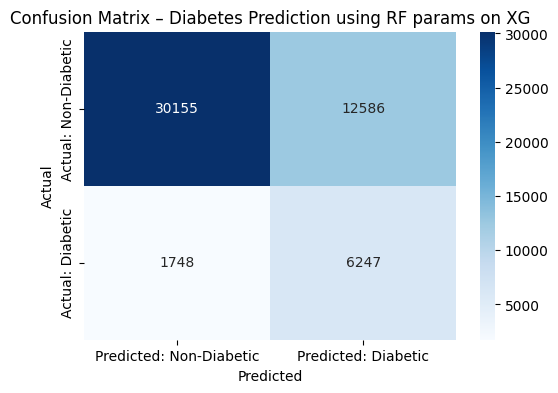

In [23]:
import pandas as pd
import xgboost
from xgboost import XGBClassifier
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import VarianceThreshold
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


# Final cleaned features
y = df_dropped['Diabetes_binary']
X = df_dropped.drop('Diabetes_binary', axis=1)

# stratification
X_train, X_test, y_train, y_test = train_test_split(
    X_cleaned_final, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

neg_count = (y_train == 0).sum()
pos_count = (y_train == 1).sum()


model=XGBClassifier(
    n_estimators=300,         # More trees for better learning
    learning_rate=0.05,       # Smaller steps for better generalization
    max_depth=4,
    subsample=0.9,
    colsample_bytree=0.6,
    scale_pos_weight=neg_count/pos_count,
    random_state=42,
    eval_metric='logloss'     # More stable for binary classification
)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
cm=confusion_matrix(y_test, y_pred)

print("🔍 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Predicted: Non-Diabetic", "Predicted: Diabetic"],
            yticklabels=["Actual: Non-Diabetic", "Actual: Diabetic"])
plt.title("Confusion Matrix – Diabetes Prediction using RF params on XG")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()


Yess! So with finetuning we can see that XGBoost performs **the best** for this dataset as it has minimized the false negatives to the best degree. The finetuning of features has taken our model to *the next level*.
The main changes we implemented:

* Increase the subsample value i.e  bigger subset  of training data for each tre
 (Sweet spot of subsample being 3 to 5)

* Decreased colsample value i.e im choosing lesser no. of features for each tree now to prevent overfitting

* As our classes are very imbalanced in the dataset (people with diabetes<< w.o diabetes) the balanced weights variable will essentially make the model so much better
* Increased estimators

* ps, it requires careful tuning (e.g., scale_pos_weight, learning rate, depth) to handle class imbalance effectively.

**RANKINGS w.r.t to IDEAL Model for Dataset (HIGH RECALL):**

1.XGBOOST

2.LOGISTIC REGRESSION

3.RF

**MODEL SUMMARY**




✅ Why Logistic Regression Outperformed Random Forest

Linearly Separable Data :
The dataset shows clear trends (e.g., higher BMI → higher diabetes risk), which linear models like Logistic Regression capture efficiently.

Less Overfitting :
Random Forest may overfit noisy or irrelevant features, especially when many input variables are binary.

Balanced Learning :
Logistic Regression handles class imbalance naturally through regularization, while tree-based models often need extra tuning (class_weight='balanced').








🚀 Why XGBoost Outperformed Both

Smart Tree Building :
XGBoost builds trees sequentially to correct errors, reducing bias and variance effectively.

Captures Feature Interactions :
In health data, combinations like HighBP + HighChol + Age are strong predictors — XGBoost excels at detecting such interactions.

Tunable & Robust :
With proper hyperparameter tuning (learning_rate, max_depth, n_estimators), XGBoost adapts well to complex patterns in the data.

💡 Key Takeaway:

 Simple ≠ Weak : Logistic Regression works well on clean, trend-driven data.
 Tree Models Need Careful Tuning : Especially with binary/ordinal features.
 XGBoost is Powerful but Requires Optimization : Use GridSearchCV or Bayesian optimization for best results.